In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



Data Collection & Analysis

In [2]:
df=pd.read_csv("insurance.csv")
print(df.shape) # gives number of rows and columns
print("------------------------------------------------")
print(df.columns)
print("------------------------------------------------")
print(df.info())
print("------------------------------------------")
print(df.describe)

(1338, 7)
------------------------------------------------
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
------------------------------------------
<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2

In [3]:
print(df.isnull().sum()) # checking for null values
print("------------------------------------------")
print(df.dtypes)
print("-------------------------------------------") 
print("number of duplicate values:",df.duplicated().sum()) # duplicates in this data set donot effect the prediction



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
------------------------------------------
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
-------------------------------------------
number of duplicate values: 1


In [4]:
# Statistical Measures
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Categorial Data:
Sex
Smoker
Region


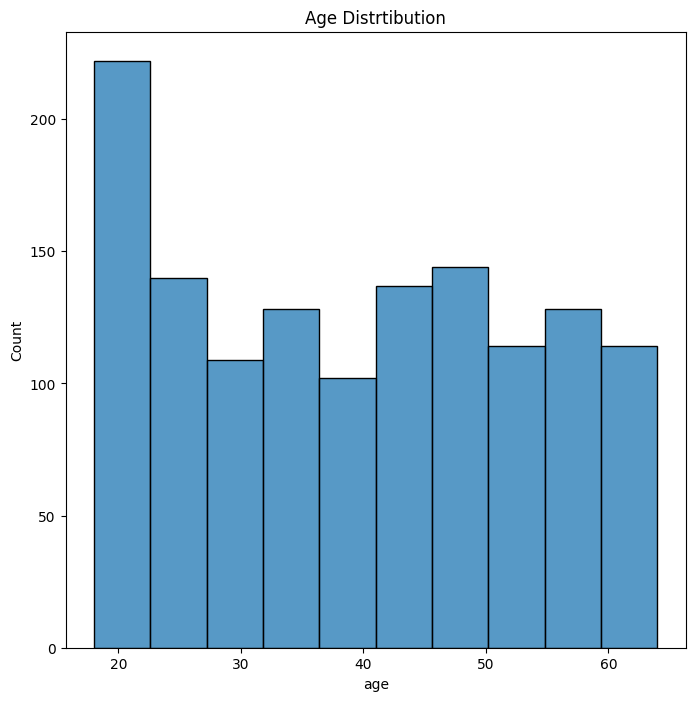

In [5]:
#Age
sns.set_color_codes()
plt.figure(figsize=(8,8))
sns.histplot(data=df,x="age",bins=10)
plt.title("Age Distrtibution")
plt.show()

sex
male      676
female    662
Name: count, dtype: int64


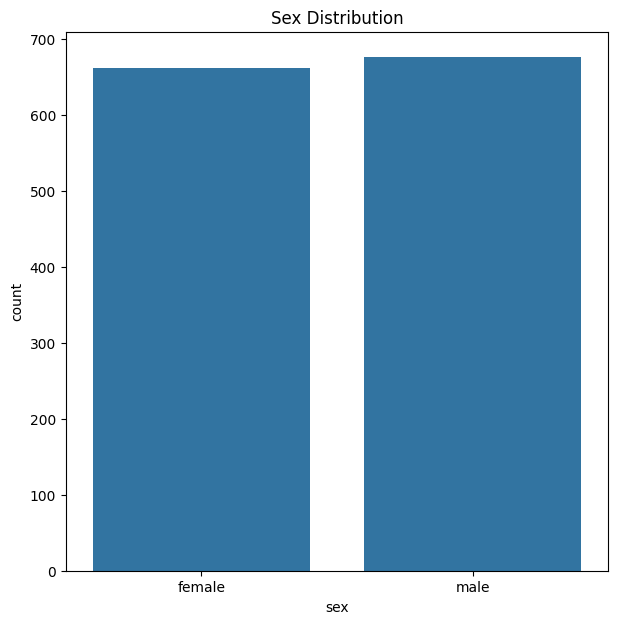

In [6]:
#Sex
sex_count=df["sex"].value_counts()
print(sex_count)
plt.figure(figsize=(7,7))
sns.countplot(x="sex",data=df)
plt.title("Sex Distribution")
plt.show()



c:\Users\lalit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

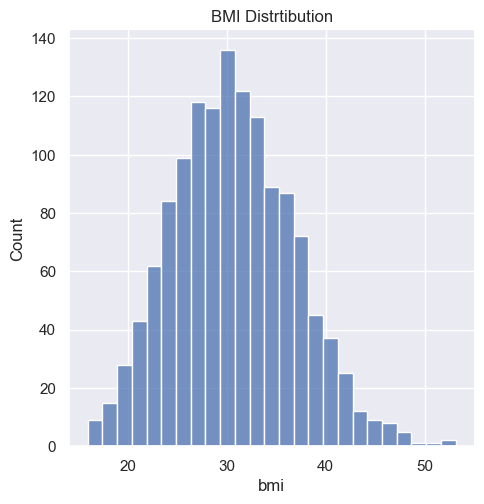

In [14]:
#BMI
plt.figure(figsize=(6,6))
sns.displot(df["bmi"])
plt.title("BMI Distrtibution")
plt.show()

Normal BMI Range ----> 18.5 to 24.9 , but here the peak stage is at above 25, so the persons in the dataset are overweight.

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


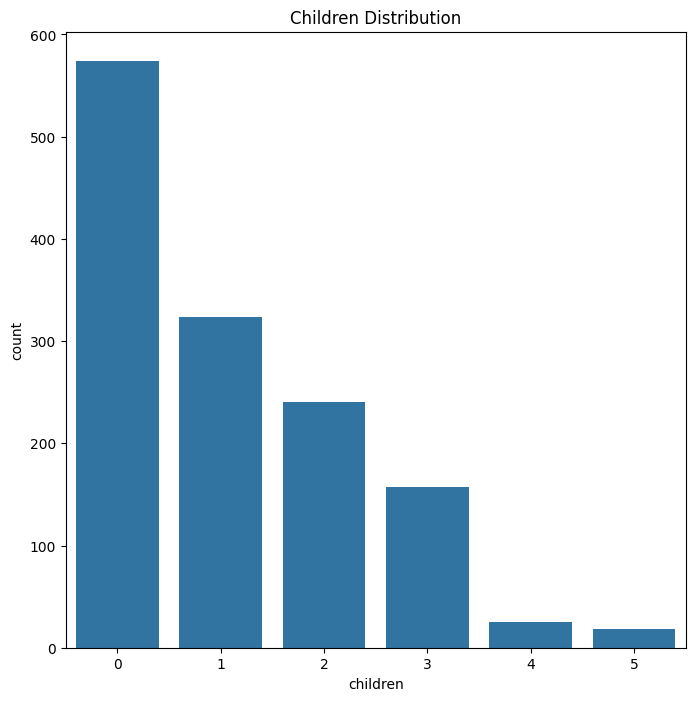

In [8]:
#Children
print(df["children"].value_counts())
plt.figure(figsize=(8,8))
sns.countplot(data=df,x="children")
plt.title("Children Distribution")
plt.show()

smoker
no     1064
yes     274
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

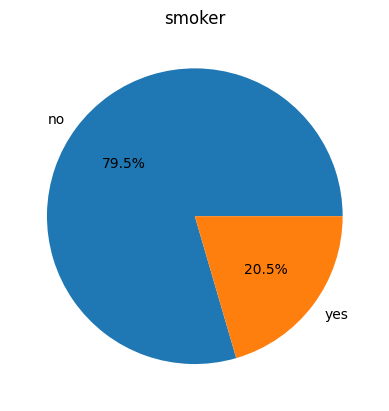

In [9]:
smokers_count=df["smoker"].value_counts()
print(smokers_count)
plt.pie(smokers_count,labels=smokers_count.index,autopct="%1.1f%%")
plt.title("smoker")
plt.show

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


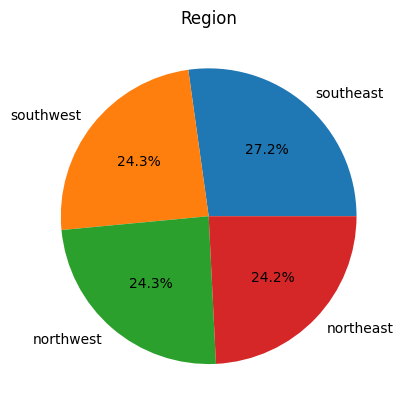

In [10]:
regions_count=df["region"].value_counts()
print(regions_count)
plt.pie(regions_count,labels=regions_count.index,autopct="%1.1f%%")
plt.title("Region")
plt.show()

C:\Users\lalit\AppData\Local\Temp\ipykernel_9728\1041655261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"])


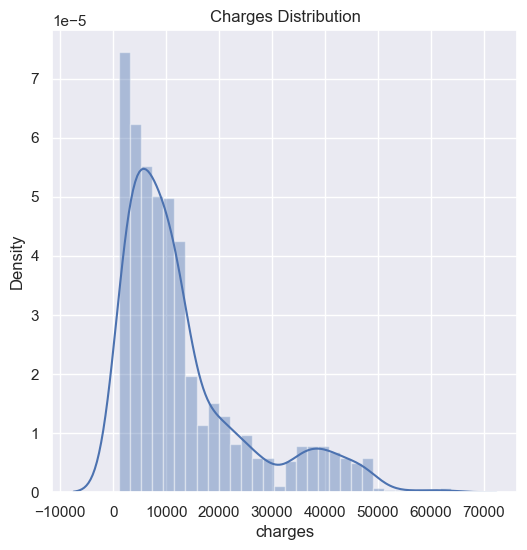

In [15]:
plt.figure(figsize=(6,6))
sns.distplot(df["charges"])
plt.title("Charges Distribution")
plt.show()

Data pre-Processing
Creating numerical labels to the categorical data which is known as encoding.

In [18]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}},inplace=True)
# print(df.head(10))
#encoding smoker column
df.replace({'smoker':{'no':1,'yes':0}},inplace=True)
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
print(df.head(10))


   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520
5   31    1  25.740         0       1       0   3756.62160
6   46    1  33.440         1       1       0   8240.58960
7   37    1  27.740         3       1       3   7281.50560
8   37    0  29.830         2       1       2   6406.41070
9   60    1  25.840         0       1       3  28923.13692


C:\Users\lalit\AppData\Local\Temp\ipykernel_9728\1010242483.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'no':1,'yes':0}},inplace=True)
C:\Users\lalit\AppData\Local\Temp\ipykernel_9728\1010242483.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


Splitting the features

In [19]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']
print(X)
print("--------------------------------------")
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
--------------------------------------
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting data into Training data & Testing data(20% testing data and 80% training data)

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print("Total inputs:",X.shape)
print("Total Training data:",X_train.shape)
print("Total Testing data:",X_test.shape)

Total inputs: (1338, 6)
Total Training data: (1070, 6)
Total Testing data: (268, 6)
